In [10]:
# 📦 Imports
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import os
import seaborn as sns



In [2]:
# 📂 Load the macro data
df = pq.read_table("../data/raw/macro_data.parquet").to_pandas()

print("Columns:")
print(df.columns.tolist())

print("\nPreview:")
print(df.head())

Columns:
['year', 'value', 'country', 'indicator']

Preview:
   year         value country       indicator
0  2023  2.772071e+13      US  NY.GDP.MKTP.CD
1  2022  2.600689e+13      US  NY.GDP.MKTP.CD
2  2021  2.368117e+13      US  NY.GDP.MKTP.CD
3  2020  2.135410e+13      US  NY.GDP.MKTP.CD
4  2019  2.153998e+13      US  NY.GDP.MKTP.CD


In [3]:
# 🧹 Clean and convert types
# df["date"] = pd.to_datetime(df["date"])
# df["year"] = df["date"].dt.year
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# 🎯 Check structure
df.head()

,year,value,country,indicator
0,2023,2.772071e+13,US,NY.GDP.MKTP.CD
1,2022,2.600689e+13,US,NY.GDP.MKTP.CD
2,2021,2.368117e+13,US,NY.GDP.MKTP.CD
3,2020,2.135410e+13,US,NY.GDP.MKTP.CD
4,2019,2.153998e+13,US,NY.GDP.MKTP.CD


In [4]:
# Number of records
df.shape

# Unique countries and indicators
df["country"].unique(), df["indicator"].unique()

# Data per country and indicator
df.groupby(["country", "indicator"])["year"].count()

country  indicator     
AU       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
BR       FP.CPI.TOTL.ZG    43
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
CA       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
CN       FP.CPI.TOTL.ZG    37
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
DE       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
FR       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
GB       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
IN       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
IT       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
JP       FP.CPI.TOTL.ZG    64
         NY.GDP.MKTP.CD    64
         SL.UEM.TOTL.ZS    29
PL       FP.CPI.TOTL.ZG    53
         NY.GDP.MKTP.CD    34
         SL.UEM.

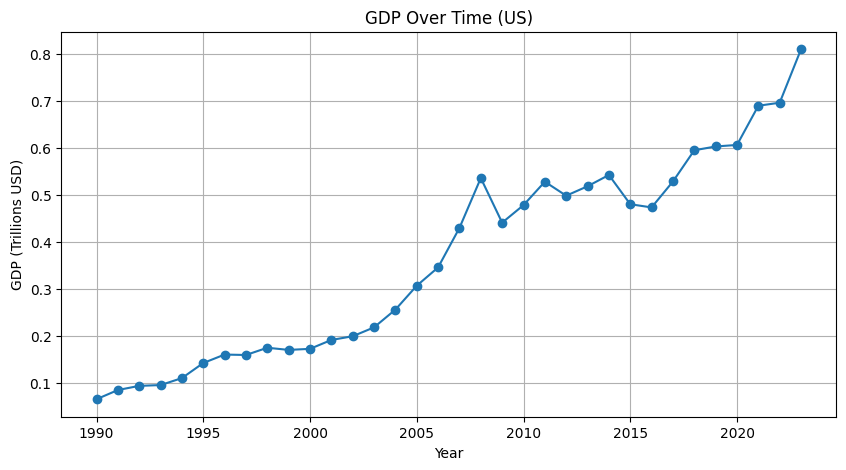

In [14]:
us_gdp = df[(df["country"] == "PL") & (df["indicator"] == "NY.GDP.MKTP.CD")]

plt.figure(figsize=(10, 5))
plt.plot(us_gdp["year"], us_gdp["value"] / 1e12, marker="o")
plt.title("GDP Over Time (US)")
plt.xlabel("Year")
plt.ylabel("GDP (Trillions USD)")
plt.grid(True)
plt.show()

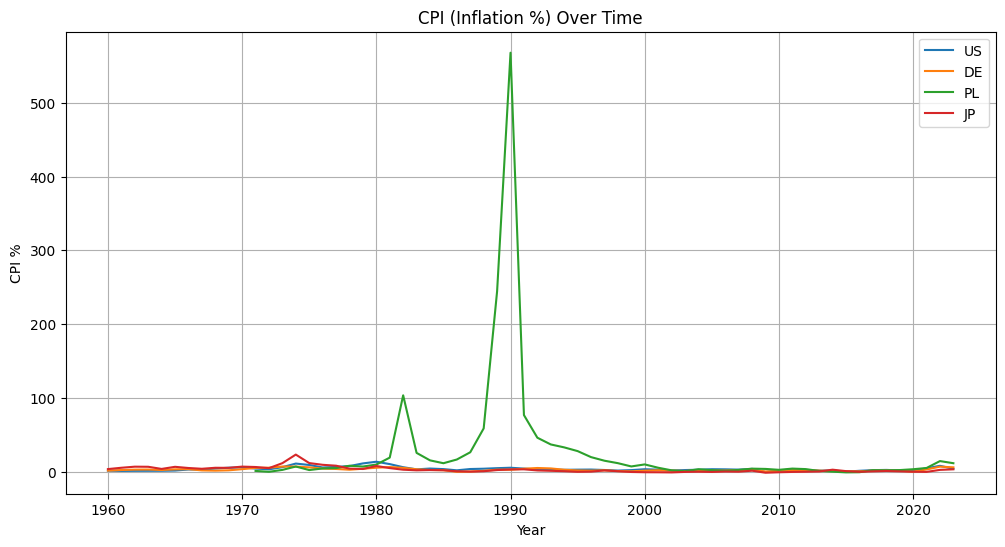

In [15]:
cpi = df[df["indicator"] == "FP.CPI.TOTL.ZG"]

plt.figure(figsize=(12, 6))
for country in cpi["country"].unique():
    country_data = cpi[cpi["country"] == country]
    plt.plot(country_data["year"], country_data["value"], label=country)

plt.title("CPI (Inflation %) Over Time")
plt.xlabel("Year")
plt.ylabel("CPI %")
plt.legend()
plt.grid(True)
plt.show()

                   gdp  unemployment
gdp           1.000000     -0.399878
unemployment -0.399878      1.000000


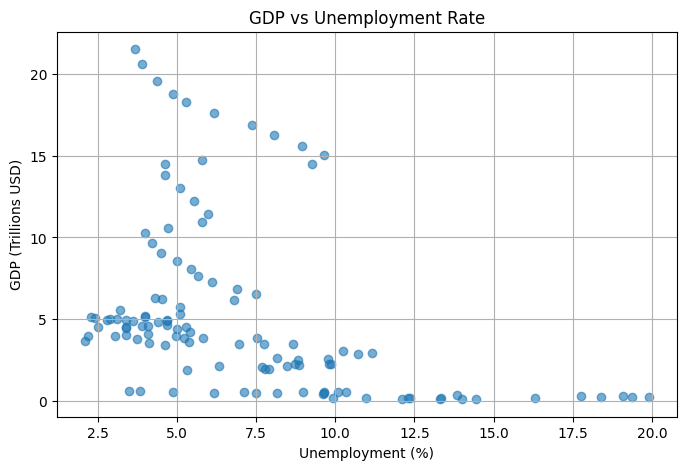

In [16]:
gdp = df[df["indicator"] == "NY.GDP.MKTP.CD"]
unemp = df[df["indicator"] == "SL.UEM.TOTL.ZS"]

merged = pd.merge(
    gdp[["year", "country", "value"]].rename(columns={"value": "gdp"}),
    unemp[["year", "country", "value"]].rename(columns={"value": "unemployment"}),
    on=["year", "country"]
)

merged.dropna(inplace=True)
merged.head()

# Correlation
print(merged[["gdp", "unemployment"]].corr())

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(merged["unemployment"], merged["gdp"] / 1e12, alpha=0.6)
plt.xlabel("Unemployment (%)")
plt.ylabel("GDP (Trillions USD)")
plt.title("GDP vs Unemployment Rate")
plt.grid(True)
plt.show()

In [20]:
df = pq.read_table("../data/raw/macro_data.parquet").to_pandas()


In [34]:
df["indicator"].unique()

array(['NY.GDP.MKTP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS'], dtype=object)

In [29]:
# Filter for GDP indicator
gdp_df = df[df["indicator"] == "NY.GDP.MKTP.CD"].copy()

# Extract year from date

# Convert GDP value to numeric
gdp_df["value"] = pd.to_numeric(gdp_df["value"], errors="coerce")

# Drop nulls and sort
gdp_df = gdp_df.dropna(subset=["value"])
gdp_df = gdp_df.sort_values(by=["country", "year"])

# Calculate GDP growth %
gdp_df["gdp_growth_pct"] = gdp_df.groupby("country")["value"].pct_change()



In [31]:
gdp_df["value"]

220    8.461985e+10
219    9.655820e+10
218    1.058954e+11
217    1.122325e+11
216    1.233304e+11
           ...     
4      2.153998e+13
3      2.135410e+13
2      2.368117e+13
1      2.600689e+13
0      2.772071e+13
Name: value, Length: 226, dtype: float64

In [38]:
print(list(gdp_df[gdp_df["country"] == "US"][["year", "value", "gdp_growth_pct"]]["year"]))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [ ]:
[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

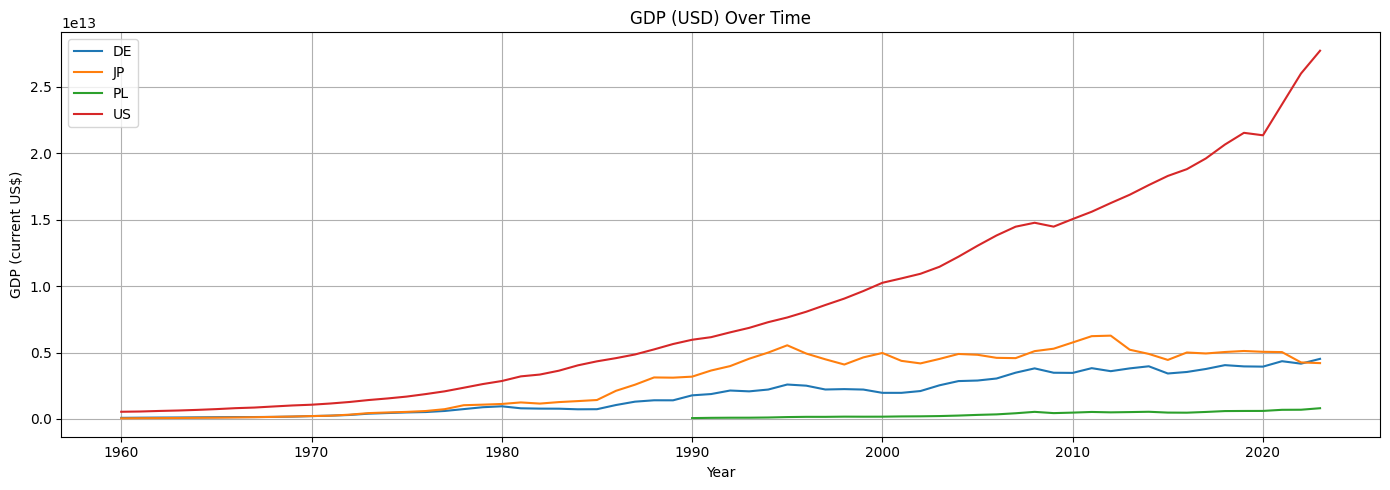

In [30]:
# Plot 1: GDP over time
plt.figure(figsize=(14, 5))
for country in gdp_df["country"].unique():
    # if country == "PL":
    plt.plot(gdp_df[gdp_df["country"] == country]["year"],
            gdp_df[gdp_df["country"] == country]["value"],
            label=country)
plt.title("GDP (USD) Over Time")
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


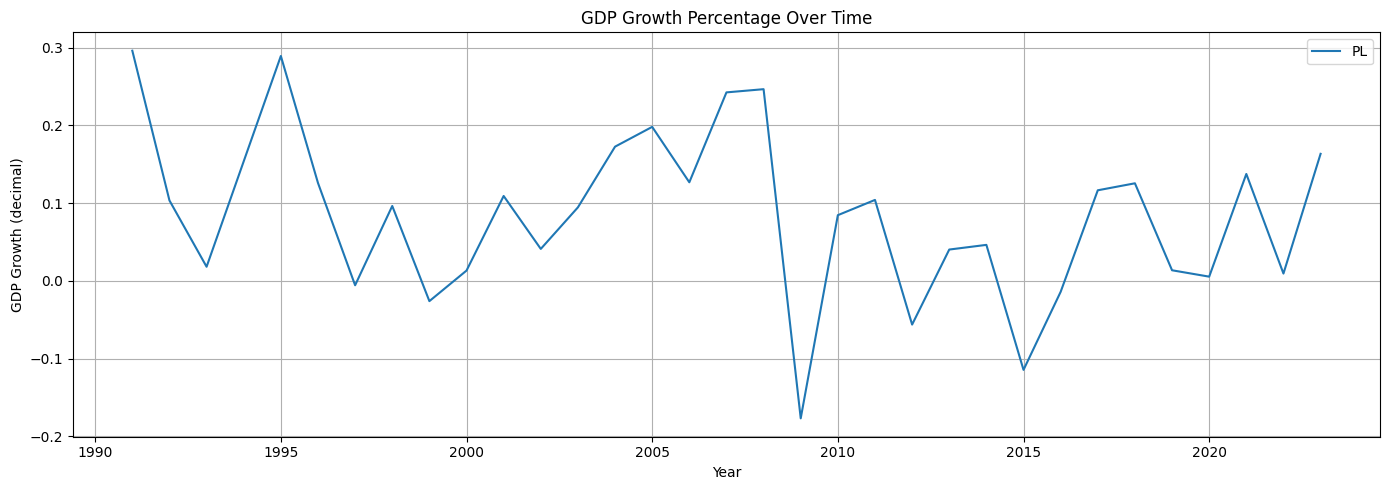

In [24]:

# Plot 2: GDP Growth %
plt.figure(figsize=(14, 5))
# for country in gdp_df["country"].unique():
for country in gdp_df["country"].unique():
    if country == "PL":
        plt.plot(gdp_df[gdp_df["country"] == country]["year"],
                gdp_df[gdp_df["country"] == country]["gdp_growth_pct"],
                label=country)
plt.title("GDP Growth Percentage Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Growth (decimal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Market Indices

In [5]:
df = pd.read_parquet("../data/raw/market_indices.parquet")

print("Columns:")
print(df.columns.tolist())

print("\nPreview:")
print(df.head())

Columns:
['Date', 'Close', 'country']

Preview:
        Date        Close country
0 2000-01-03  1455.219971      US
1 2000-01-04  1399.420044      US
2 2000-01-05  1402.109985      US
3 2000-01-06  1403.449951      US
4 2000-01-07  1441.469971      US


In [ ]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Create output dir
os.makedirs("charts", exist_ok=True)

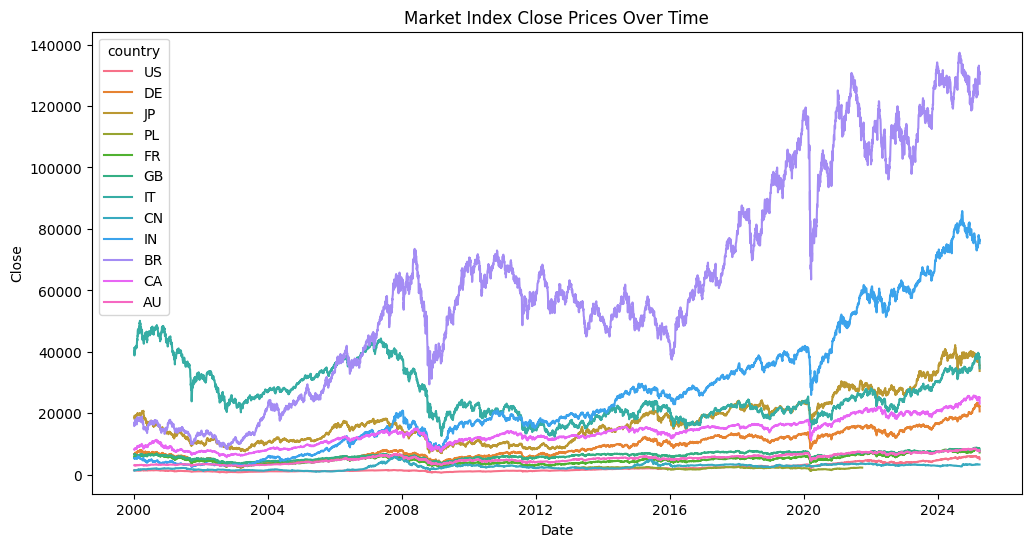

In [13]:
# Plot 1: Close Prices Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Close", hue="country")
plt.title("Market Index Close Prices Over Time")
plt.savefig("charts/close_prices_over_time.png")
plt.show()

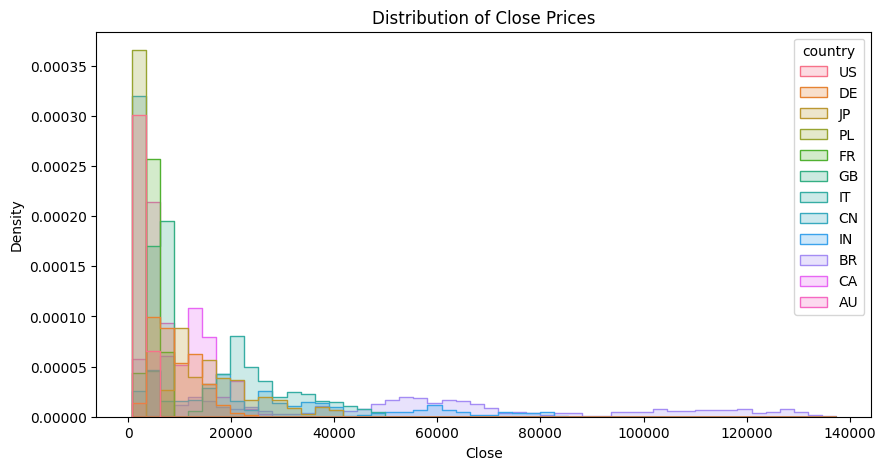

In [14]:
# Plot 2: Close Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Close", hue="country", bins=50, element='step', stat='density', common_norm=False)
plt.title("Distribution of Close Prices")
plt.savefig("charts/close_price_distribution.png")
plt.show()

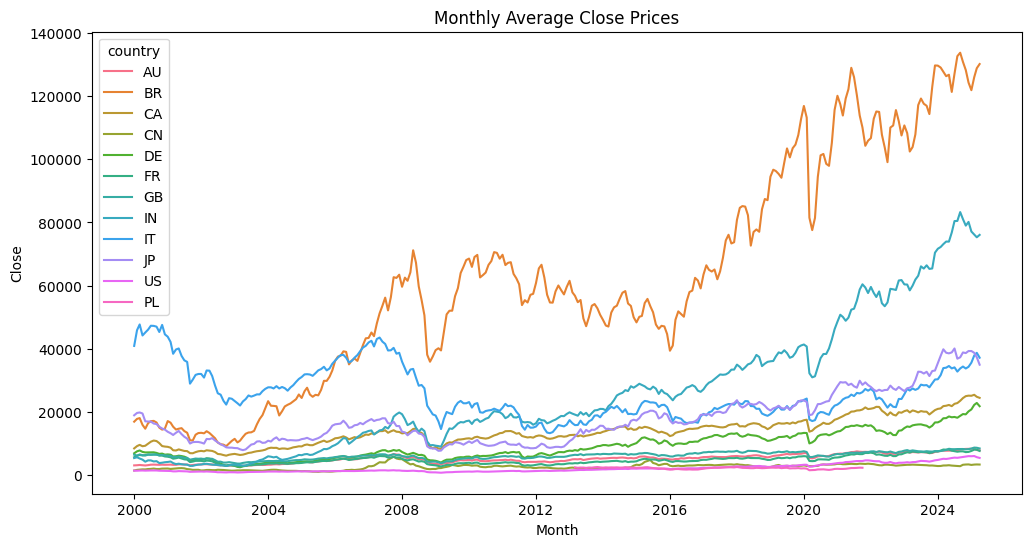

In [15]:
# Plot 3: Monthly Average Close Prices
df["Month"] = df["Date"].dt.to_period("M").dt.to_timestamp()
monthly_avg = df.groupby(["Month", "country"])["Close"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x="Month", y="Close", hue="country")
plt.title("Monthly Average Close Prices")
plt.savefig("charts/monthly_avg_close_prices.png")
plt.show()